# Introduction to NetworkX
## Outline

1. Creating and Manipulating Graphs
    * Adding specific nodes and edges.
    * Adding and updating node and edge attributes.
    * Graph generators.
    * Visualizing Graphs.
    * Reading and Writing Graphs from/to Files. 
2. Analyzing Graphs
    * Basic concepts: Degree.
    * Distance measures: paths, simple paths, and shortest paths.
    * Connected Components.

## Creating and Manipulating Graphs

[NetworkX](https://networkx.org/en/) is a python package for the analysis of networks.

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 

### Manually adding and removing Nodes and Edges

Nodes can be any hashable object.

A graph $G$ can be grown in several ways:

* Add nodes with:
    - **G.add_node** : One node at a time
    - **G.add_nodes_from** : A container of nodes
* Add edges with:
    - **G.add_edge**: One edge at a time
    - **G.add_edges_from** : A container of edges

Similarly you can remove specific nodes and edges.

* Remove nodes with:
    - **G.remove_node** : One node at a time
    - **G.remove_nodes_from** : A container of nodes
* Remove edges with:
    - **G.remove_edge**: One edge at a time
    - **G.remove_edges_from** : A container of edges

If the edge added already exists no error is raised.

If the nodes referred by edges do not already exist they are automatically added to the graph.

In [ ]:
# Create an empty undirected Graph
G = nx.Graph()

# One node at a time
G.add_node('A')

# A list of nodes
G.add_nodes_from(['B', 'C'])

# Adding a single edge
G.add_edge('A', 'B')

# Add a list of edges 
G.add_edges_from([('B', 'C'), ('C', 'A')])


{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0}

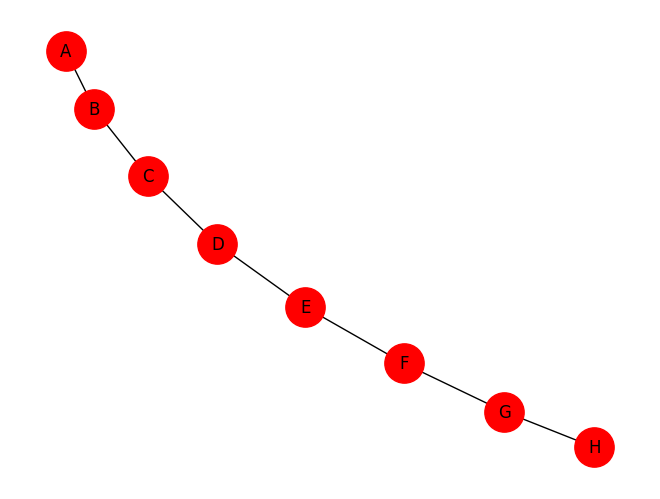

In [ ]:
nx.draw(G, node_size=800, node_color='red', with_labels=True)

In [7]:
# Print the adjacency object.
print(G.adj)

{'A': {'B': {}, 'C': {}}, 'B': {'A': {}, 'C': {}}, 'C': {'B': {}, 'A': {}}}


In [8]:
# Check whether a node is in G
'A' in G

True

In [9]:
# Iterate over the nodes
for n in G:
    print(n)

A
B
C


In [10]:
# Show the nodes adjacent to a specific node
G['A']

AtlasView({'B': {}, 'C': {}})

In [11]:
# Retrieve the number of nodes of the graph.
len(G)

3

In [12]:
# Retrieve the number of nodes and edges in the graph.
print(G.number_of_nodes(), G.number_of_edges())

3 3


### Adding and Updating Node, and Edge Attributes

Each node, and edge can hold key/value attribute pairs in an associated attribute dictionary.

In [13]:
# set attribute value when adding a node
G.add_node('D', room=715)

# set/update node attribute value later
nx.set_node_attributes(G, {'A': 123, 'B': 463, 'C': 389}, 'room')

# access the value of a specific node and attribute
print(G.nodes['D']['room'])

# access node attribute values for all nodes in graph
print(nx.get_node_attributes(G, 'room'))

715
{'A': 123, 'B': 463, 'C': 389, 'D': 715}


8
{('A', 'B'): 8, ('A', 'C'): 6, ('A', 'D'): 4, ('B', 'C'): 2}


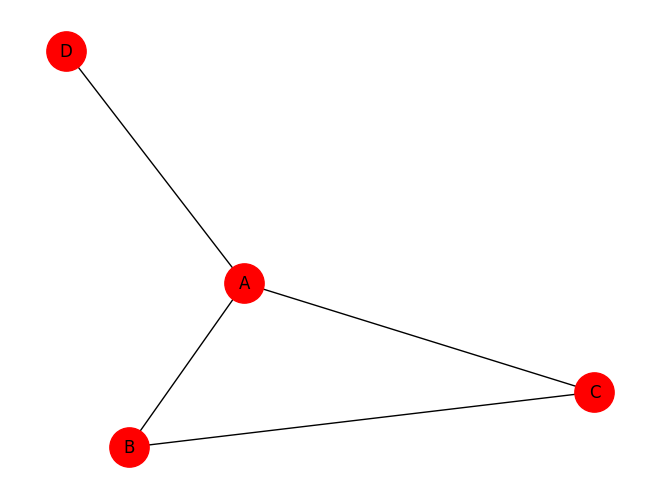

In [14]:
# set attribute value when adding an edge
G.add_edge('A', 'D', weight=4)

# set/update edge attribute value later
nx.set_edge_attributes(G, {('A', 'B'): {'weight':8}, 
                           ('B', 'C'): {'weight':2}, 
                           ('C', 'A'): {'weight':6}})

# When an edge is already added you can use subscript notation or update the edge attribute dictionary
print(G['A']['B']['weight'])

# access edge attribute values for all edges in graph
print(nx.get_edge_attributes(G, 'weight'))

nx.draw(G, node_size=800, node_color='red', with_labels=True)

### More ways to build graphs: operators.

Applying classic [graph operations](https://networkx.org/documentation/stable/reference/algorithms/operators.html), for example:
* _nx.subgraph(G, node_list)_ : induce subgraph of G on nodes in node_list
* _nx.union(G1,G2)_ : graph union assuming unique nodes
* _nx.compose(G1,G2)_:  graph union that allows common nodes and edges
* _nx.complement(G)_: graph complement (same nodes, complement of edges)
* _nx.create_empty_copy(G)_: keep the nodes, remove the edges

### Graph Generators

Take a look at all NetworkX [Graph generators](https://networkx.github.io/documentation/stable/reference/generators.html)

Some examples:

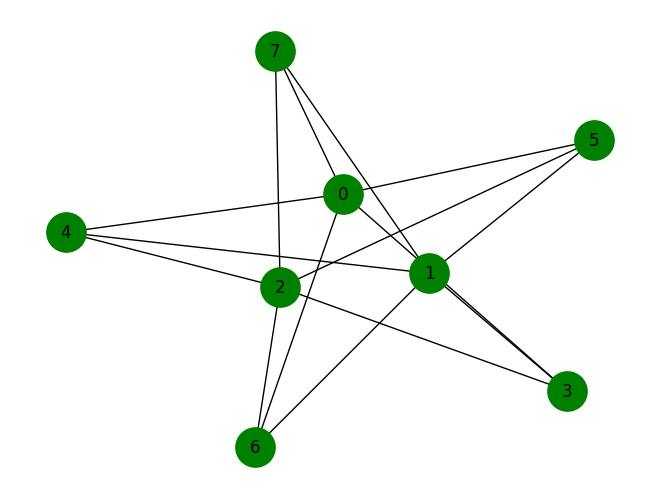

In [15]:
# small graphs
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

# classic graphs
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

nx.draw(K_3_5, node_size=800, node_color='green', with_labels=True)

### Visualizing graphs

NetworkX contains a set of graph layout algorithms that position nodes in 2 and 3-dimensions in order to plot them.

We'll use as an example the network of relations between elite families in renaissance Florence. Edges represent marriage ties between families. NetworkX provides this network of florentine families modeled as an undirected graph.

In [16]:
F = nx.florentine_families_graph()

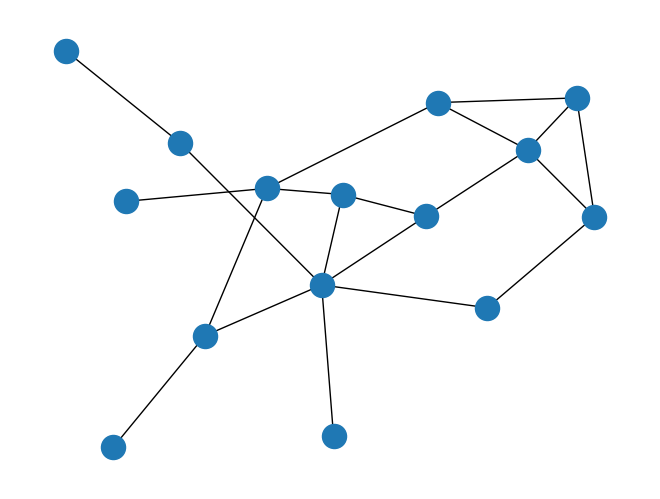

In [17]:
# The function nx.draw is main entry point for NetworkX plotting functions
nx.draw(F)

NetworkX, also offers a variety of other [layout algorithms](https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout). We can precompute the layout for a given graph and then pass it to the **nx.draw** function.

In [18]:
pos_spring = nx.spring_layout(F)
pos_fr = nx.fruchterman_reingold_layout(F)
pos_fr

{'Acciaiuoli': array([-0.55552668,  0.13031894]),
 'Medici': array([-0.25492846, -0.01647264]),
 'Castellani': array([ 0.29523472, -0.51271922]),
 'Peruzzi': array([ 0.57340328, -0.37936411]),
 'Strozzi': array([ 0.37858336, -0.28370547]),
 'Barbadori': array([-0.05677316, -0.39334396]),
 'Ridolfi': array([ 0.06233068, -0.12280673]),
 'Tornabuoni': array([0.03751908, 0.1201833 ]),
 'Albizzi': array([-0.0624602 ,  0.39310321]),
 'Salviati': array([-0.67998818, -0.1851641 ]),
 'Pazzi': array([-1.        , -0.29669041]),
 'Bischeri': array([ 0.53525509, -0.05190321]),
 'Guadagni': array([0.31845642, 0.29760614]),
 'Ginori': array([-0.15280858,  0.74034683]),
 'Lamberteschi': array([0.56170263, 0.56061141])}

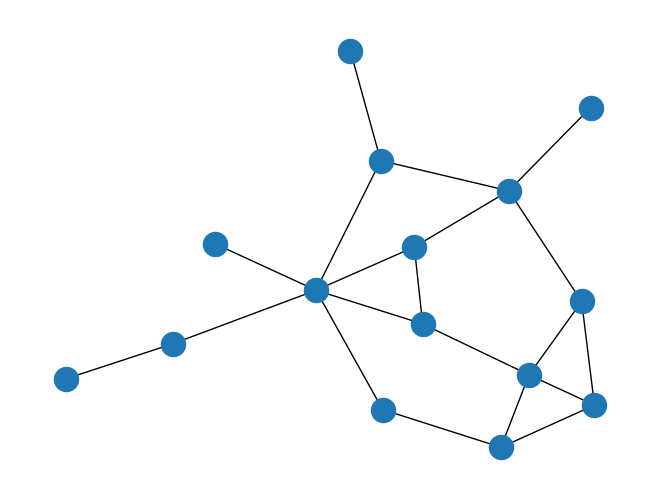

In [19]:
nx.draw(F, pos=pos_fr)

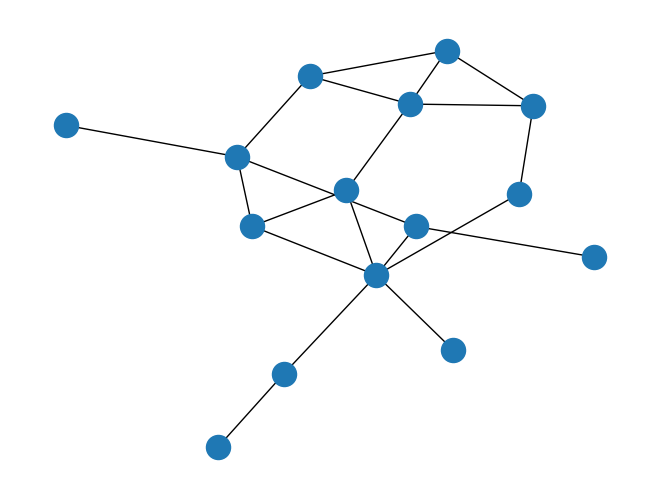

In [20]:
nx.draw(F, pos=pos_spring)

We can also control the size and color of the nodes, the with of the edges, the labels of the nodes and their fonts via *kwargs* of **nx.draw**:

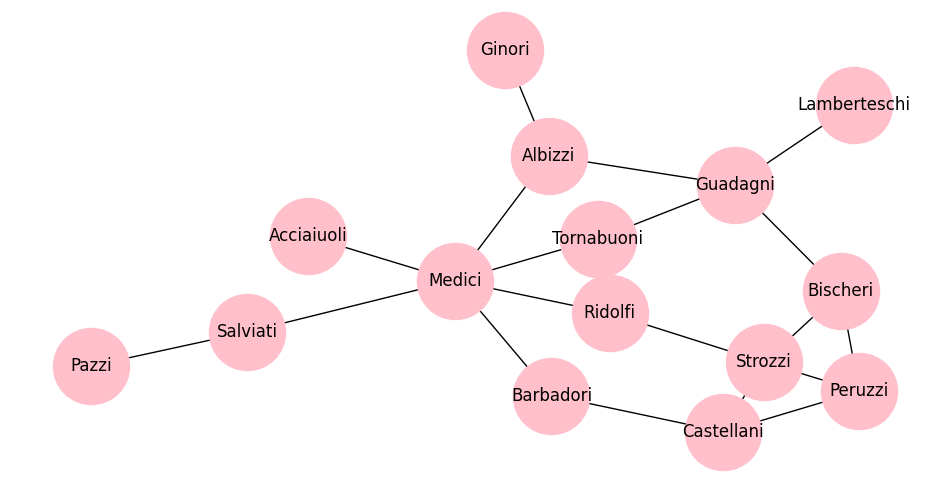

In [21]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
nx.draw(F, pos=pos_fr, node_size=3000, node_color='pink', with_labels=True, ax=ax)

If we want to plot more complex plots, for instance, plot nodes of different colors and sizes, add labels to only some nodes, add edge labels, etc., we can use more specialized plot functions such as: , _nx.draw_networkx_nodes_, _nx.draw_networkx_edges_, _nx.draw_networkx_lables_, _nx.draw_networkx_edge_lables_.

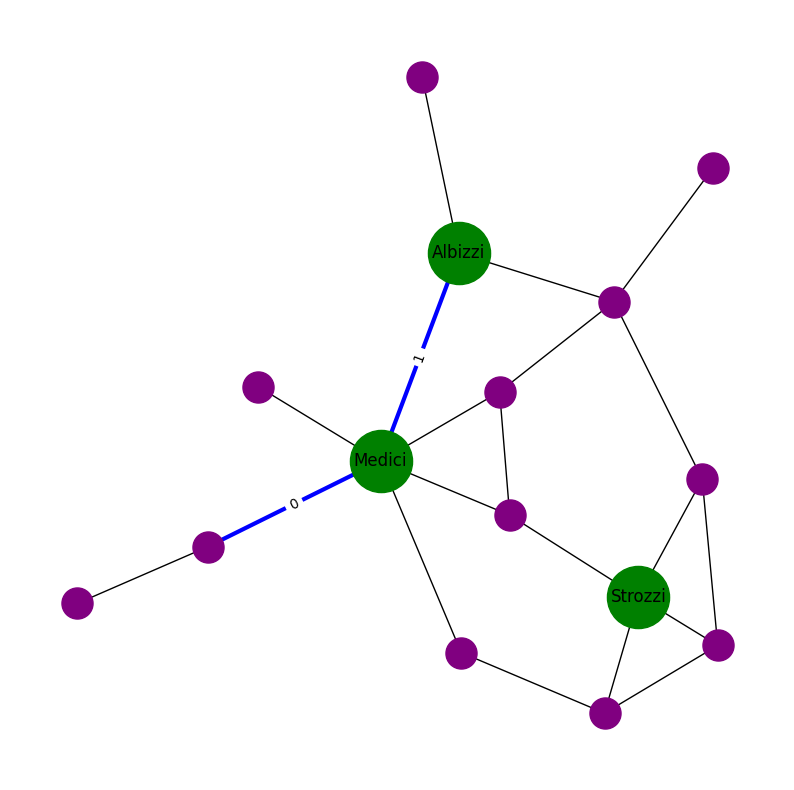

In [22]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
big_and_green_nodes = {'Medici', 'Albizzi', 'Strozzi'}
other_nodes = set(F) - big_and_green_nodes
thick_edges = {('Medici', 'Albizzi'), ('Medici', 'Salviati')}
other_edges = set(F.edges()) - thick_edges

# Plot nodes
nx.draw_networkx_nodes(F, pos=pos_fr, nodelist=big_and_green_nodes, node_size=2000, node_color='green', ax=ax)
nx.draw_networkx_nodes(F, pos=pos_fr, nodelist=other_nodes, node_size=500, node_color='purple', ax=ax)

# Plot edges 
nx.draw_networkx_edges(F, pos=pos_fr, edgelist=thick_edges, width=3, edge_color='blue', ax=ax)
nx.draw_networkx_edges(F, pos=pos_fr, edgelist=other_edges, ax=ax)

# Plot node labels
nx.draw_networkx_labels(F, pos=pos_fr, labels={n: n for n in big_and_green_nodes}, ax=ax)

# Plot edge labels
nx.draw_networkx_edge_labels(F, pos=pos_fr, edge_labels={e: i for i, e in enumerate(thick_edges)}, ax=ax)

# Remove axes
ax.set_axis_off()

### Reading and Writing Graphs 

You can see the complete list of supported formats at [Read and Write documentation](https://networkx.github.io/documentation/stable/reference/readwrite/index.html)

Some examples of the most common formats:

* **Adjacency list** Simple format, no attributes
    - **nx.read_adjlist**
    - **nx.write_adjlist**
* **Edge list** Simple format, no attributes
    - **nx.read_edgelist**
    - **nx.write_adjlist**
* **GEXF** Designed to be a standard exchange format for graphs (Gephi)
    - **nx.read_gexf**
    - **nx.write_gexf**

In [32]:
# write graph to file in gexf format
nx.write_gexf(G, "test_graph.gexf", encoding='utf-8', prettyprint=True)

## Analyzing Graphs

Now we'll focus on some key analysis techniques that will allow us to understand the structure of social networks and the importance of its components.

In [33]:
# get degrees of all nodes
print("All degrees:", dict(F.degree()))

# get the degree for a single node
print("Degree of Medici:", F.degree('Medici'))

# get the neighbors of node 'Medici'
med = list(F.neighbors('Medici'))
print("Neighbors of Medici:", *med)

# get node with max degree
print("Max degree:", max(F, key=F.degree))

All degrees: {'Acciaiuoli': 1, 'Medici': 6, 'Castellani': 3, 'Peruzzi': 3, 'Strozzi': 4, 'Barbadori': 2, 'Ridolfi': 3, 'Tornabuoni': 3, 'Albizzi': 3, 'Salviati': 2, 'Pazzi': 1, 'Bischeri': 3, 'Guadagni': 4, 'Ginori': 1, 'Lamberteschi': 1}
Degree of Medici: 6
Neighbors of Medici: Acciaiuoli Barbadori Ridolfi Tornabuoni Albizzi Salviati
Max degree: Medici


### Paths, simple paths, and shortest paths

* A **path** is an alternating sequence of distinct nodes and edges in which each edge is incident with its preceding and following nodes. The length of a path is the number of edges it contains. 

* A **simple path** is a path with no repeated nodes. See NetworkX documentation for [simple paths](http://networkx.readthedocs.io/en/stable/reference/algorithms.simple_paths.html).

* The **shortest path** between two nodes is a path with the minimum number of edges. The **distance** between any two nodes $u$ and $v$ of $G$, denoted $d_{G}(u,v)$, is the length of the shortest path between them. See NetworkX documentation for [shortest paths](http://networkx.readthedocs.io/en/stable/reference/algorithms.shortest_paths.html).

NetworkX has high level functions for simple paths and shortest paths that accept directed, undirected and multigraphs and do the right thing. For instance, for directed graphs the paths have to follow the direction of the edges.

NetworkX represents the paths as list of nodes, from that it's easy to get the edges that form the path

Using the examples from the degree section:

In [25]:
source = 'Medici'
target = 'Peruzzi'

# check whether or not there exists a path between two nodes
print("\"There is a path between {} and {}\": {}".format(source, target, 
                        nx.has_path(F, source, target)))

# compute length of shortest path between a given pair of nodes
print("Distance between {} and {}: {}".format(source, target, 
                        nx.shortest_path_length(F, source, target)))

# list all nodes in the shortest path between any pair of nodes
print("Shortest path between {} and {}: {}".format(source, target, 
                        nx.shortest_path(F, source, target)))

"There is a path between Medici and Peruzzi": True
Distance between Medici and Peruzzi: 3
Shortest path between Medici and Peruzzi: ['Medici', 'Barbadori', 'Castellani', 'Peruzzi']


In [26]:
# Shortest paths may not necessarily be unique
list(nx.all_shortest_paths(F, source, target))

[['Medici', 'Barbadori', 'Castellani', 'Peruzzi'],
 ['Medici', 'Ridolfi', 'Strozzi', 'Peruzzi']]

In [27]:
def plot_paths(G, paths):
    plt.figure(figsize=(12,12))
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=3000, node_color='pink')
    nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G})
    # Draw edges
    nx.draw_networkx_edges(G, pos=pos)
    for path in paths:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='blue', width=3)
    ax = plt.gca()
    ax.set_axis_off()
    ax.grid(None)

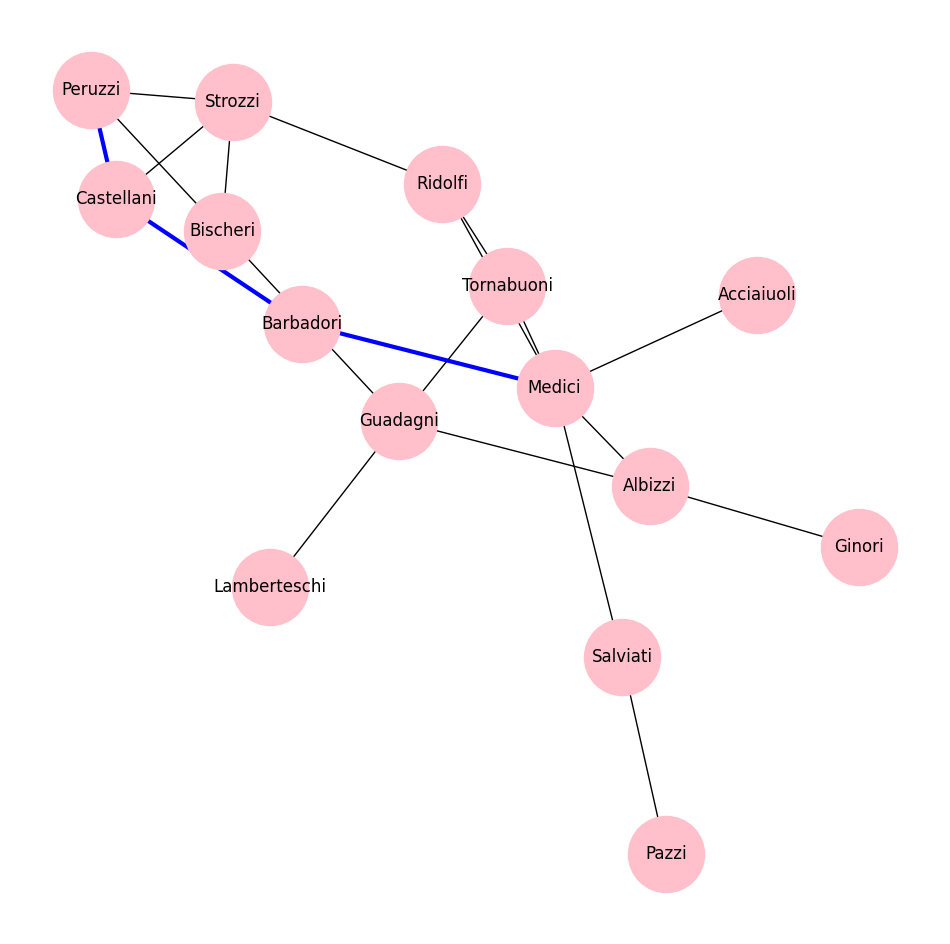

In [28]:
plot_paths(F, [nx.shortest_path(F, source, target)])

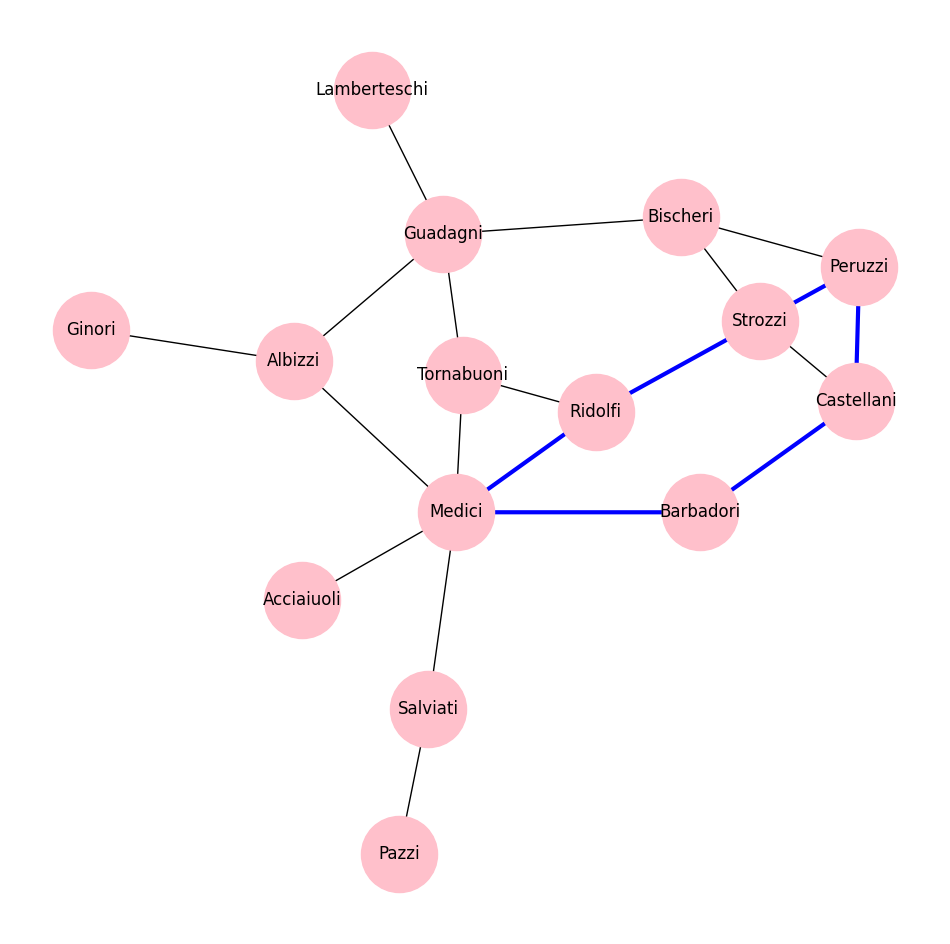

In [29]:
plot_paths(F, nx.all_shortest_paths(F, source, target))

#### Connected components
A **component** is a maximally connected subgraph.

You can check NetworkX documentation for the functions that deal with [components](https://networkx.github.io/documentation/stable/reference/algorithms/component.html).

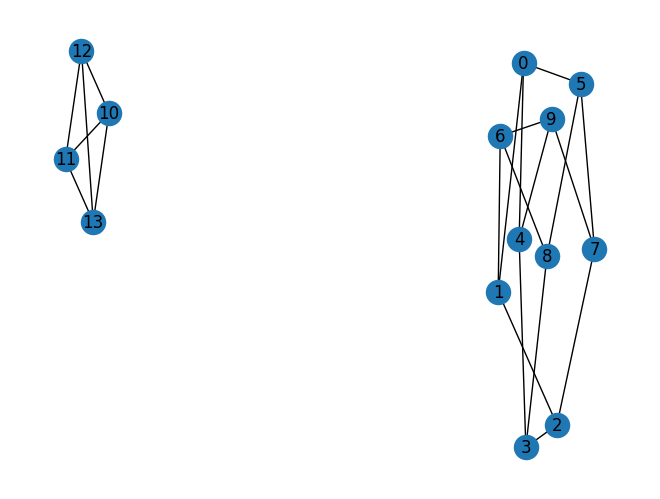

In [30]:
# Example: Create a graph with two connected components
C = nx.disjoint_union(nx.petersen_graph(), nx.tetrahedral_graph())
nx.draw(C, with_labels=True)

The function **nx.connected_components** yields sets of nodes that form the components of the graph. If you want the induced subgraphs of the components you have to use **nx.connected_component_subgraphs**

In [31]:
# get nodes in each connected component
print(list(nx.connected_components(C)))

# get size of largest connected component
largest = max(nx.connected_components(C), key=len)
len(largest)

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12, 13}]


10

# Credits

This notebook has been adapted from [here](https://github.com/jtorrents/pydata_bcn_NetworkX). 